In [1]:
import rasterio
import numpy as np
from matplotlib import pyplot
import stac

In [2]:
s = stac.STAC('http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.0')

In [3]:
s.catalog

dict_keys(['C64mMEDIAN', 'C64mSTACK', 'S1016dMEDIAN', 'S1016dSTACK', 'C6416dMEDIAN', 'C6416dSTACK', 'S10mMEDIAN', 'S10mSTACK', 'S2SR', 'LC8SR', 'MOD13Q1', 'MYD13Q1', 'HLS.L30', 'HLS.S30', 'C64mWARPED', 'S1016dWARPED', 'C6416dWARPED', 'S10mWARPED', 'S2TOA', 'S2SR_SEN28', 'LC8DN'])

In [4]:
collection = s.collections['C64mMEDIAN']
collection

{'description': 'C64mMEDIAN collection with blue, green, red, nir, evi, ndvi bands',
 'extent': {'spatial': {'bbox': [[-134.197,
     -25.781958400275,
     -34.932356288847,
     25.4435]]},
  'temporal': {'interval': [['2016-09-01', '2019-09-30']]}},
 'id': 'C64mMEDIAN',
 'license': '',
 'links': [{'href': 'http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.0/collections/C64mMEDIAN',
   'rel': 'self'},
  {'href': 'http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.0/collections/C64mMEDIAN/items',
   'rel': 'items'},
  {'href': 'http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.0/collections',
   'rel': 'parent'},
  {'href': 'http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.0/collections',
   'rel': 'root'},
  {'href': 'http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.0/stac',
   'rel': 'root'}],
 'properties': {'bdc:bands': {'blue': {'data_type': 'UInt16',
    'description': '',
    'fill': 0,
    'max': 10000.0,
    'mime_type': 'image/tiff',
    'min': 0.0,
    'name': 'blue',
    'resolution_uni

In [5]:
items = s.collections['C64mMEDIAN'].get_items()
items

{'features': [{'assets': {'blue': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_2019-09-01_blue_MEDIAN.tif'},
    'evi': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_2019-09-01_evi_MEDIAN.tif'},
    'green': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_2019-09-01_green_MEDIAN.tif'},
    'ndvi': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_2019-09-01_ndvi_MEDIAN.tif'},
    'nir': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_2019-09-01_nir_MEDIAN.tif'},
    'red': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_2019-09-01_red_MEDIAN.tif'},
    'thumbnail': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64

In [6]:
items.features[0].assets

{'blue': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_2019-09-01_blue_MEDIAN.tif'},
 'evi': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_2019-09-01_evi_MEDIAN.tif'},
 'green': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_2019-09-01_green_MEDIAN.tif'},
 'ndvi': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_2019-09-01_ndvi_MEDIAN.tif'},
 'nir': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_2019-09-01_nir_MEDIAN.tif'},
 'red': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_2019-09-01_red_MEDIAN.tif'},
 'thumbnail': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C64m/043049/2019-09-01-2019-09-30/C64m_043049_

In [7]:
red = items.features[0].assets['red'].download()
green = items.features[0].assets['green'].download()
blue = items.features[0].assets['blue'].download()

red

'C64m_043049_2019-09-01_red_MEDIAN.tif'

In [8]:
r = rasterio.open(red).read(1)
g = rasterio.open(green).read(1)
b = rasterio.open(blue).read(1)


In [9]:
r.max()

3993

In [10]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

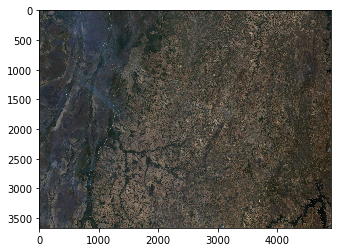

In [11]:
rgb = np.dstack((normalize(r), normalize(g), normalize(b)))
pyplot.imshow(rgb)